<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering

### Customer Spend Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore
%matplotlib inline

In [2]:
df = pd.read_csv('/content/Cust_Spend_Data.csv')

In [3]:
df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [4]:
df_attr = df.iloc[:, 2:]

In [5]:
df_attr

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3
5,4000,3,0,1,8
6,2500,5,0,11,2
7,2500,3,0,1,1
8,2000,2,0,2,2
9,1000,4,0,1,7


In [6]:
df_scaled = df_attr.apply(zscore)

In [7]:
df_scaled

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


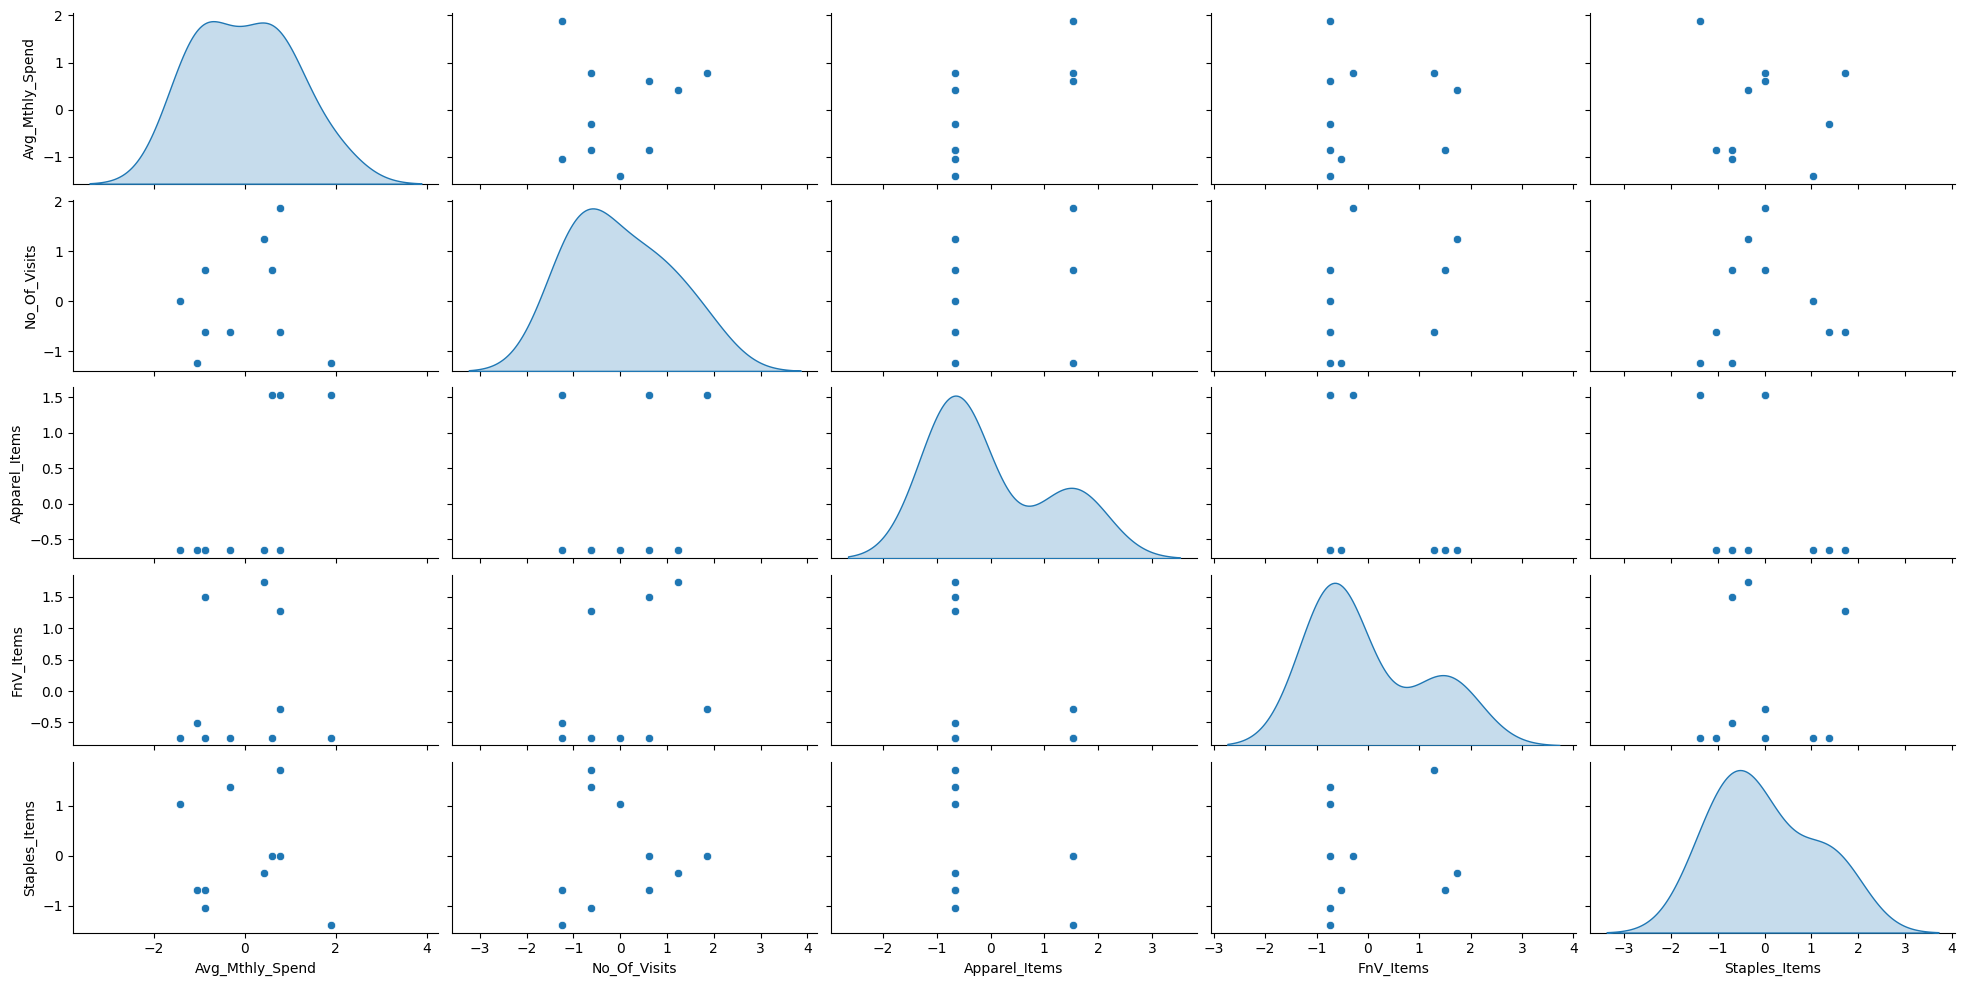

In [8]:
sns.pairplot(df_scaled, height = 2, aspect = 2, diag_kind = 'kde')

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
model = AgglomerativeClustering(n_clusters= 3, metric = 'euclidean', linkage = 'average')

In [11]:
pred = model.fit(df_scaled)

In [12]:
pred.labels_

array([0, 1, 0, 0, 1, 2, 1, 2, 2, 2])

In [13]:
df_attr['labels'] = pred.labels_

In [14]:
df_attr

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1
5,4000,3,0,1,8,2
6,2500,5,0,11,2,1
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [15]:
df_attr[df_attr['labels']==0]

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0


In [16]:
df_attr[df_attr['labels']==1]

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
1,7000,3,0,10,9,1
4,6000,6,0,12,3,1
6,2500,5,0,11,2,1


In [17]:
df_attr[df_attr['labels']==2]

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
5,4000,3,0,1,8,2
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [18]:
df_clust = df_attr.groupby(['labels'])

In [19]:
df_clust.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


In [20]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [21]:
from scipy.spatial.distance import pdist #Pairwise distribution between data points

In [22]:
Z = linkage (df_scaled, metric = 'euclidean', method = 'average')

In [23]:
c, coph_dists = cophenet(Z, pdist(df_scaled))

c

0.8681149436293064

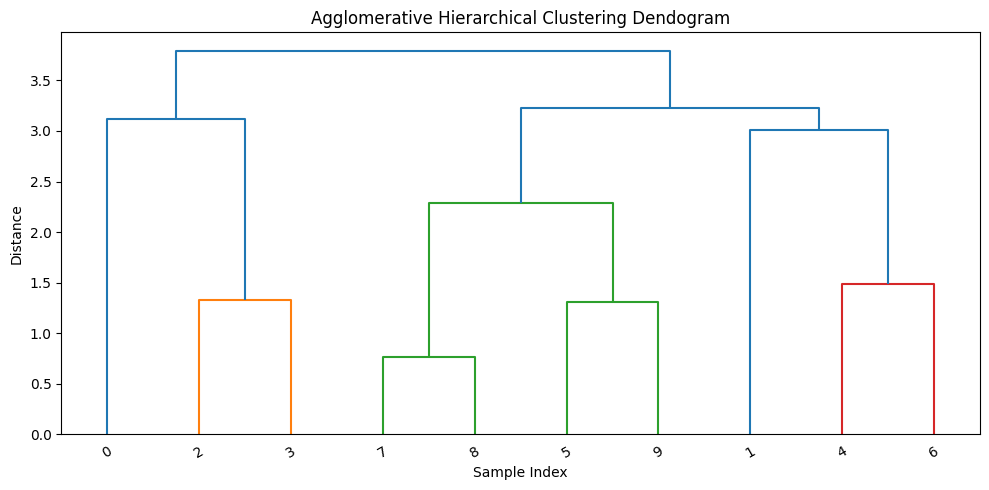

In [24]:
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation = 30, leaf_font_size = 10)
plt.tight_layout()

In [25]:
Z = linkage (df_scaled, metric = 'euclidean', method = 'complete')

In [26]:
c, coph_dists = cophenet(Z, pdist(df_scaled))

c

0.8606955190809153

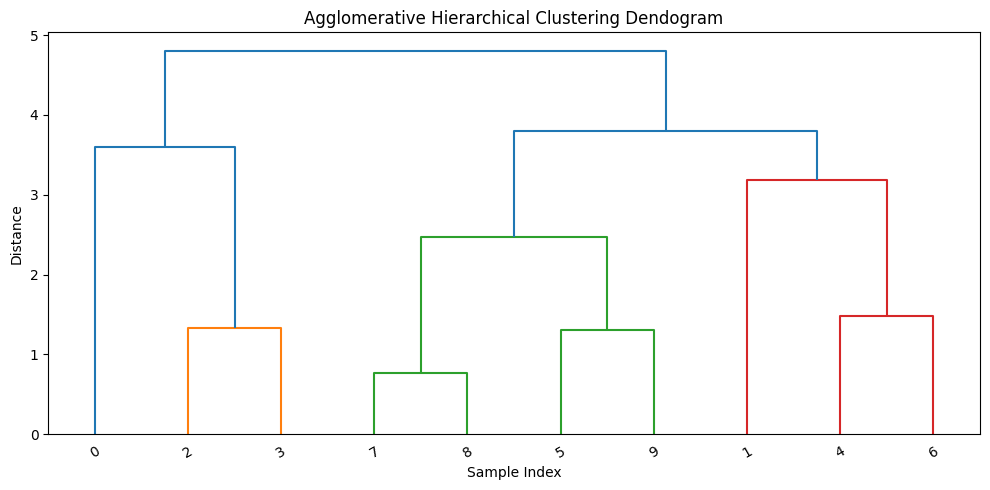

In [27]:
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation = 30, leaf_font_size = 10)
plt.tight_layout()

In [28]:
Z = linkage (df_scaled, metric = 'euclidean', method = 'ward')

In [29]:
c, coph_dists = cophenet(Z, pdist(df_scaled))

c

0.8453818941339526

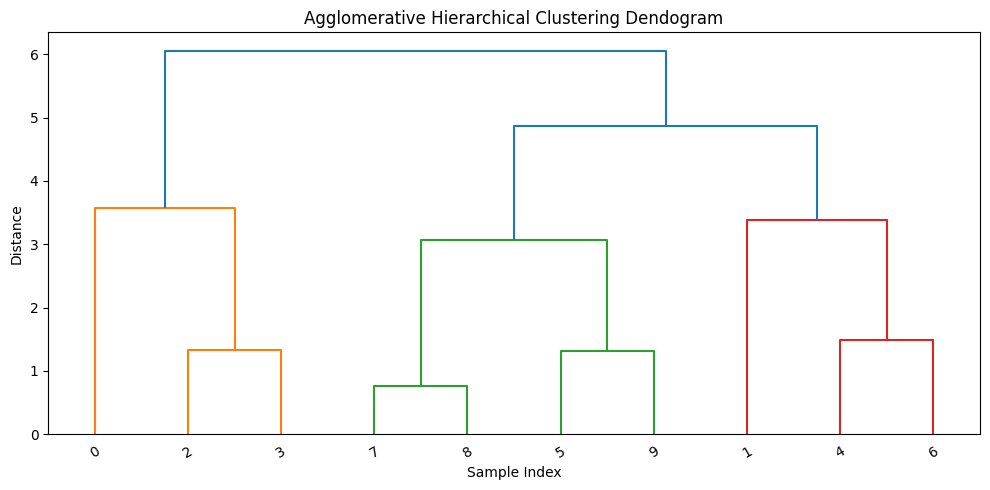

In [30]:
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation = 30, leaf_font_size = 10)
plt.tight_layout()